# PHASE 1 PROJECT 


## Final Project Submission

Please fill out:
* Student name: CYNTHIAH CHELIMO MULWO
* Student pace: FULL TIME
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

# BOM.MOVIE_GROSS.CSV

importing the pandas,numpy,csv and matplotlib as they are required libraries

In [1]:
import pandas as pd 
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv('/home/cynthiah/Project/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv')

we base our data on the rows whose domestic gross is more than 100000000 so that we can use them for our analysis

In [3]:
df = df[df['domestic_gross'] > 100000000]
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3116,Crazy Rich Asians,WB,174500000.0,64000000,2018
3119,Creed II,MGM,115700000.0,98300000,2018
3121,The Equalizer 2,Sony,102100000.0,88300000,2018
3123,The Mule,WB,103800000.0,68700000,2018


lets confirm our datatypes before working with them

In [4]:
df.columns
df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

since foreign gross is type object, we turn it to float and remove any letters or characters that might be present

In [5]:
df['foreign_gross'].replace('\W', '', regex=True, inplace= True)
df.foreign_gross = df.foreign_gross.astype(float)

In [6]:
df.head(20)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010
6,Iron Man 2,Par.,312400000.0,311500000.0,2010
7,Tangled,BV,200800000.0,391000000.0,2010
8,Despicable Me,Uni.,251500000.0,291600000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010


We should create another column;box office which is a sum of domestic gross and foreign gross in every row

In [7]:
df['box_office'] =( df.domestic_gross) + (df.foreign_gross)
df

,title,studio,domestic_gross,foreign_gross,year,box_office
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3116,Crazy Rich Asians,WB,174500000.0,64000000.0,2018,2.385000e+08
3119,Creed II,MGM,115700000.0,98300000.0,2018,2.140000e+08
3121,The Equalizer 2,Sony,102100000.0,88300000.0,2018,1.904000e+08
3123,The Mule,WB,103800000.0,68700000.0,2018,1.725000e+08


#  data cleaning

In [8]:
##checking for duplicates
df.duplicated().value_counts()

False    284
dtype: int64

since there are no duplicated rows in this data then we check for the null

In [9]:
##checking for null values.NaNs return true while valid data returns false
df.isna()

,title,studio,domestic_gross,foreign_gross,year,box_office
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3116,False,False,False,False,False,False
3119,False,False,False,False,False,False
3121,False,False,False,False,False,False
3123,False,False,False,False,False,False


In [10]:
##the sum of null values
df.isna().sum

<bound method DataFrame.sum of       title  studio  domestic_gross  foreign_gross   year  box_office
0     False   False           False          False  False       False
1     False   False           False          False  False       False
2     False   False           False          False  False       False
3     False   False           False          False  False       False
4     False   False           False          False  False       False
...     ...     ...             ...            ...    ...         ...
3116  False   False           False          False  False       False
3119  False   False           False          False  False       False
3121  False   False           False          False  False       False
3123  False   False           False          False  False       False
3129  False   False           False          False  False       False

[284 rows x 6 columns]>

In [11]:
#####fill the missing data from domestic gross with its median
median_domestic_gross = df['domestic_gross'].median()
df['domestic_gross'] = df['domestic_gross'].fillna(median_domestic_gross)

In [12]:
foreign_gross=df['foreign_gross']
foreign_gross.isna().value_counts()

False    284
Name: foreign_gross, dtype: int64

lets see the most used studios

# data visualization

In [13]:
#####check for the most used studios
df.studio.value_counts()

BV         49
Uni.       43
Fox        42
WB         41
Sony       32
Par.       31
WB (NL)    16
P/DW        8
LGF         6
LG/S        5
Wein.       4
Sum.        2
TriS        1
MGM         1
STX         1
FoxS        1
SGem        1
Name: studio, dtype: int64

create a histogram to compare the most used studio visually

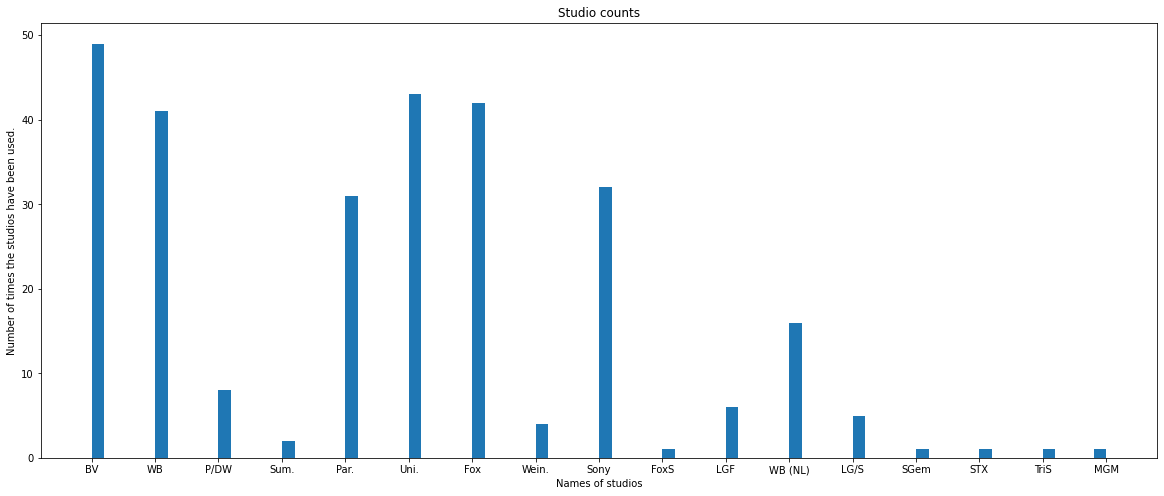

In [14]:
fig, ax = plt.subplots(figsize = (20,8))
ax.hist(df.studio, bins = 80)
ax.set_xlabel('Names of studios')
ax.set_ylabel('Number of times the studios have been used.')
ax.set_title('Studio counts');

lets create a bar graph to see the relationship between studios and total film revenues

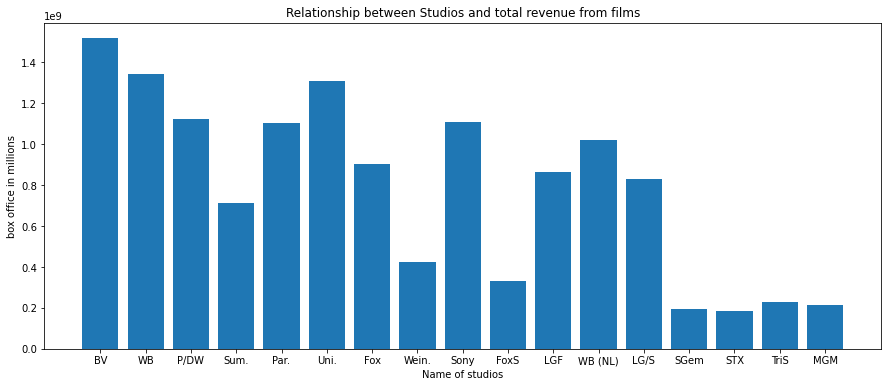

In [15]:
fig, ax = plt.subplots(figsize=(15,6))
plt.bar( x= df.studio, height= df.box_office)
plt.xlabel('Name of studios')
plt.ylabel('box office in millions')
plt.title('Relationship between Studios and total revenue from films')
plt.show()

# MOVIES.CSV

lets analyse and use the next data, movies.csv

In [16]:
movies_df= pd.read_csv('/home/cynthiah/Project/dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv')

In [17]:
movies_df.head(15)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [18]:
movies_df.shape

(26517, 10)

check for duplicates

In [19]:
movies_df.duplicated().value_counts()

False    26517
dtype: int64

false shows that none of the data is duplicated

# data cleaning

In [20]:
#lets see if there are any missing data
movies_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [21]:
movies_df['original_language'].isna().value_counts()

False    26517
Name: original_language, dtype: int64

In [22]:
movies_df.title.unique()

array(['Harry Potter and the Deathly Hallows: Part 1',
       'How to Train Your Dragon', 'Iron Man 2', ..., 'The Last One',
       'Trailer Made', 'The Church'], dtype=object)

In [23]:
movies_df['vote_average'].mean()

5.991281064977184

In [24]:
movies_df['original_language'].unique()

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

In [25]:
original_language = movies_df['original_language']
vote_avarage = movies_df['vote_average']
vote_count=movies_df['vote_count']
popularity=movies_df['popularity']
original_title=['original_title']

lets see the most used language

In [26]:
movies_df.original_language.value_counts().head(15)

en    23291
fr      507
es      455
ru      298
ja      265
de      237
zh      177
hi      172
it      123
pt       96
ko       93
sv       68
da       54
pl       52
no       50
Name: original_language, dtype: int64

# data visualization

lets plot a histogram for the most used language

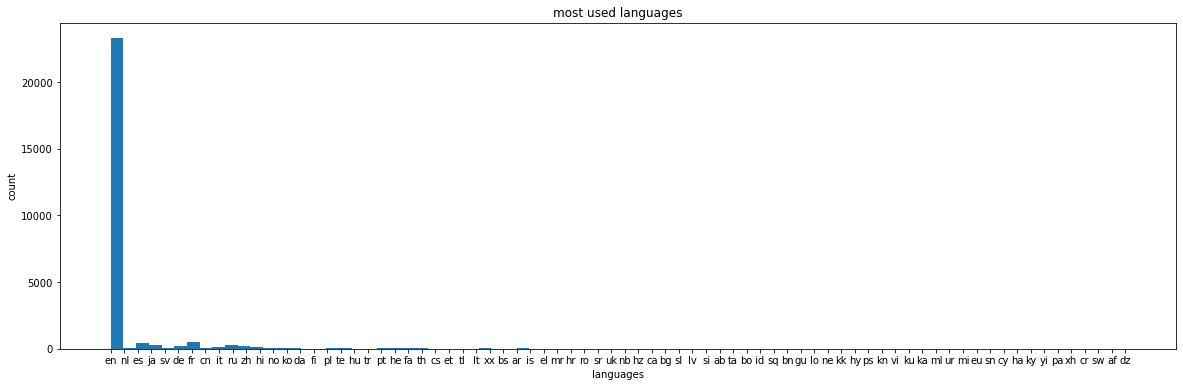

In [27]:
fig, ax = plt.subplots(figsize = (20,6))
ax.hist(movies_df.original_language, bins = 80)
ax.set_xlabel('languages')
ax.set_ylabel('count')
ax.set_title('most used languages');

lets plot a bargraph showing the avarage votes based on languages

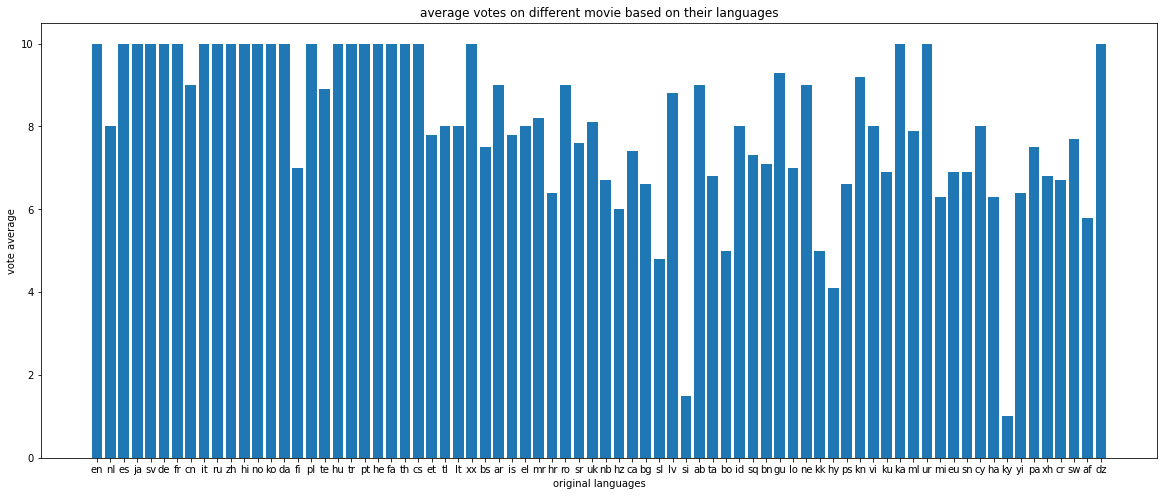

In [28]:
fig, ax = plt.subplots(figsize=(20,8))
plt.bar( x= movies_df.original_language, height=movies_df.vote_average)
plt.xlabel('original languages')
plt.ylabel('vote average')
plt.title('average votes on different movie based on their languages')
plt.show()

#    IM.DB

lets analyse another dataset;imdb which we will need sqlite3 and pandas to work with it

In [29]:
import sqlite3
import pandas as pd

In [30]:
conn=sqlite3.connect('/home/cynthiah/Project/dsc-phase-1-project-v2-4/zippedData/im.db')

In [31]:
cur=conn.cursor()

In [32]:
#executing the query
cur.execute("""
SELECT name
FROM sqlite_master 
WHERE type = 'table';

""")
## fetching the results in tables
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [33]:
import pandas as pd
pd.DataFrame(
data=cur.execute("""SELECT * 
FROM movie_basics ;""").fetchall(),
columns=[x[0] for x in cur.description]
  )

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [34]:
pd.DataFrame(
data=cur.execute("""SELECT * 
FROM movie_ratings ;""").fetchall(),
columns=[x[0] for x in cur.description]
  )

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [35]:
import pandas as pd
pd.DataFrame(
data=cur.execute("""SELECT * 
FROM movie_basics
JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id;""").fetchall(),
columns=[x[0] for x in cur.description]
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [36]:
##to check the higher rated movies and their genres
pd.DataFrame(
data=cur.execute("""SELECT original_title,genres,averagerating
FROM movie_basics
JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id
 WHERE averagerating == 10
 ORDER BY averagerating DESC
 ;""").fetchall(),
columns=[x[0] for x in cur.description]
)

,original_title,genres,averagerating
0,Atlas Mountain: Barbary Macaques - Childcaring...,Documentary,10.0
1,Requiem voor een Boom,Documentary,10.0
2,Freeing Bernie Baran,"Crime,Documentary",10.0
3,Hercule contre Hermès,Documentary,10.0
4,Pick It Up! - Ska in the '90s,Documentary,10.0
5,Revolution Food,Documentary,10.0
6,A Dedicated Life: Phoebe Brand Beyond the Group,Documentary,10.0
7,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,10.0
8,Dog Days in the Heartland,Drama,10.0
9,Fly High: Story of the Disc Dog,Documentary,10.0


In [37]:
pd.DataFrame(
data=cur.execute("""SELECT *
FROM movie_basics
JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id
 WHERE genres IS NULL
 
 
 
 ;""").fetchall(),
columns=[x[0] for x in cur.description]
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0253093,Gangavataran,Gangavataran,2018,134.0,None,tt0253093,6.6,8
1,tt0306058,Second Coming,Second Coming,2012,95.0,None,tt0306058,5.5,20
2,tt0326592,The Overnight,The Overnight,2010,88.0,None,tt0326592,7.5,24
3,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,None,tt0330811,6.2,10
4,tt0330987,"Tiden är en dröm, del 2","Tiden är en dröm, del 2",2014,109.0,None,tt0330987,6.3,6
...,...,...,...,...,...,...,...,...,...
799,tt9742106,The Cat in Their Arms,Neko wa Daku Mono,2018,NaN,None,tt9742106,4.5,8
800,tt9828428,Anjali CBI,Anjali CBI,2019,NaN,None,tt9828428,7.6,20
801,tt9866736,Rise: Ini Kalilah,Rise: Ini Kalilah,2018,NaN,None,tt9866736,5.8,11
802,tt9876160,Koridor bessmertiya,Koridor bessmertiya,2019,125.0,None,tt9876160,5.4,45


In [38]:
pd.DataFrame(
data=cur.execute("""SELECT *
FROM movie_basics
WHERE genres IS NULL
 
 
 
 ;""").fetchall(),
columns=[x[0] for x in cur.description]
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,None
1,tt0253093,Gangavataran,Gangavataran,2018,134.0,None
2,tt0306058,Second Coming,Second Coming,2012,95.0,None
3,tt0326592,The Overnight,The Overnight,2010,88.0,None
4,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,None
...,...,...,...,...,...,...
5403,tt9907396,Footloose in the Cotswolds - Part 1,Footloose in the Cotswolds - Part 1,2016,118.0,None
5404,tt9907608,Footloose in the Cotswolds - Part 2,Footloose in the Cotswolds - Part 2,2016,102.0,None
5405,tt9910922,Doctor Who Augmented Reality: Times Magazine,Doctor Who Augmented Reality: Times Magazine,2013,NaN,None
5406,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None


In [39]:
pd.DataFrame(
data=cur.execute("""SELECT *
FROM movie_basics
WHERE original_title IS NULL
 
 
 
 ;""").fetchall(),
columns=[x[0] for x in cur.description]
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt2397619,Woody Allen: A Documentary,None,2012,195.0,None
1,tt3414266,The Outer Loop,None,2013,78.0,None
2,tt3616658,The Hangman,None,2017,NaN,None
3,tt4548042,Urban Legend: The Blind Side Strangler,None,2016,NaN,None
4,tt4599436,Please Don't Eat the Pansies,None,2016,NaN,None
5,tt4715728,Regen,None,2016,NaN,None
6,tt4732998,Limbo,None,2017,NaN,None
7,tt4940426,OldZilla,None,2018,NaN,None
8,tt6092540,Rangreza,None,2017,NaN,None
9,tt6107024,The Cage,None,2017,NaN,None


In [40]:
pd.DataFrame(
data=cur.execute("""SELECT *
FROM movie_basics
WHERE runtime_minutes IS NULL
 
 
 
 ;""").fetchall(),
columns=[x[0] for x in cur.description]
)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,None,"Comedy,Drama"
1,tt0112502,Bigfoot,Bigfoot,2017,None,"Horror,Thriller"
2,tt0139613,O Silêncio,O Silêncio,2012,None,"Documentary,History"
3,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,None,None
4,tt0250404,Godfather,Godfather,2012,None,"Crime,Drama"
...,...,...,...,...,...,...
31734,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,None,Family
31735,tt9916428,The Secret of China,The Secret of China,2019,None,"Adventure,History,War"
31736,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,None,Documentary
31737,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,None,Comedy


In [41]:
pd.DataFrame(
data=cur.execute("""SELECT *
FROM movie_ratings
WHERE numvotes IS NULL
 
 
 
 ;""").fetchall(),
columns=[x[0] for x in cur.description]
)

,movie_id,averagerating,numvotes


In [42]:
pd.DataFrame(
data=cur.execute("""SELECT *
FROM movie_ratings
WHERE averagerating IS NULL
 
 
 
 ;""").fetchall(),
columns=[x[0] for x in cur.description]
)

,movie_id,averagerating,numvotes


In [43]:
pd.DataFrame(
data=cur.execute("""SELECT *
FROM movie_ratings
WHERE movie_id IS NULL
 
 
 
 ;""").fetchall(),
columns=[x[0] for x in cur.description]
)

,movie_id,averagerating,numvotes


In [44]:
q="""
SELECT * 
FROM movie_ratings
GROUP BY movie_id

"""
movie_rate_and_votes = pd.read_sql(q,conn)

In [45]:
movie_rate_and_votes

,movie_id,averagerating,numvotes
0,tt0063540,7.0,77
1,tt0066787,7.2,43
2,tt0069049,6.9,4517
3,tt0069204,6.1,13
4,tt0100275,6.5,119
...,...,...,...
73851,tt9913084,6.2,6
73852,tt9914286,8.7,136
73853,tt9914642,8.5,8
73854,tt9914942,6.6,5


lets plot two graphs, a scatter plot and a line plot to see the relationship between the avarage rating and number of votes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
movie_rate_and_votes.columns
plt.figure(figsize=(10,6))
sns.regplot(x=movie_rate_and_votes['averagerating'] , y=movie_rate_and_votes['numvotes'])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
movie_rate_and_votes.columns
plt.figure(figsize=(10,6))
sns.lineplot(x=movie_rate_and_votes['averagerating'] , y=movie_rate_and_votes['numvotes'])

we loaded the most rated movie genres and plotted graph of it

In [ ]:
g="""SELECT original_title,genres,averagerating
FROM movie_basics
JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id
 WHERE averagerating == 10
 ORDER BY averagerating DESC"""
movie_rates=pd.read_sql(g,conn)

<AxesSubplot:xlabel='genres', ylabel='averagerating'>

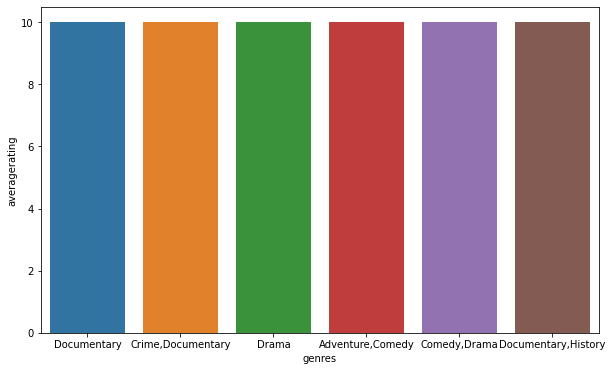

In [52]:
movie_rates.columns
plt.figure(figsize=(10,6))
sns.barplot(x=movie_rates['genres'] , y=movie_rates['averagerating'])

In [53]:
conn.close()

# movie_budgets

In [54]:
movie_budgets = pd.read_csv('/home/cynthiah/Project/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv',index_col=0)

In [55]:
movie_budgets.head(20)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


to ensure that the data is workablewith by removing all symbols and str

In [56]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('[$,]','')

movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(float)

In [57]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('[$,]','')

movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(float)
movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000.0,$0,0.000000e+00
79,"Apr 2, 1999",Following,6000.0,"$48,482",2.404950e+05
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338",1.338000e+03


lets select the data whose worldwode gross  is above 100000000 to work with

In [58]:
movie_budgets = movie_budgets[movie_budgets['worldwide_gross'] > 100000000]
movie_budgets.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,"$936,662,225",2.053311e+09
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,"$309,420,425",9.634204e+08
9,"Nov 17, 2017",Justice League,300000000.0,"$229,024,295",6.559452e+08


lets check the correlation between production budget and worldwide gross

In [59]:
correlation = movie_budgets.corr()
correlation. style. background_gradient (cmap = 'BrBG')

,production_budget,worldwide_gross
production_budget,1.000000,0.626202
worldwide_gross,0.626202,1.000000


lets plot a graph to show us the correlation

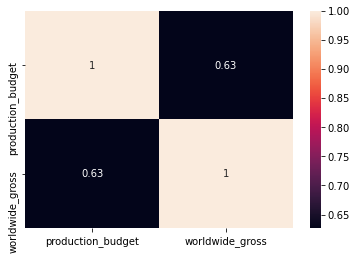

In [60]:
sns. heatmap (correlation, annot=True);

That is the end of our analysis